In [1]:
import pandas as pd

In [2]:
data = pd.read_excel(r"C:\Users\HP\Downloads\Kim assignments\Real estate valuation data set.xlsx")

In [3]:
data.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

In [5]:
X = data.drop(columns=['Y house price of unit area'])
y = data['Y house price of unit area']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
model = LinearRegression()

In [8]:
model.fit(X_train, y_train)

LinearRegression()

In [9]:
y_pred = model.predict(X_test)

In [10]:
mae = mean_absolute_error(y_test, y_pred)

In [11]:
mse = mean_squared_error(y_test, y_pred)

In [12]:
rmse = np.sqrt(mse)

In [13]:
r2 = r2_score(y_test, y_pred)

In [14]:
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared Score:", r2)

Mean Absolute Error: 5.418032735899195
Mean Squared Error: 54.598848304988614
Root Mean Squared Error: 7.389103349188494
R-squared Score: 0.674541419569233


In [15]:
from sklearn.decomposition import PCA

In [16]:
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

In [17]:
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.2, random_state=42)

In [18]:
model_pca = LinearRegression()

In [19]:
model_pca.fit(X_train_pca, y_train_pca)

LinearRegression()

In [20]:
y_pred_pca = model_pca.predict(X_test_pca)

In [21]:
mae_pca = mean_absolute_error(y_test_pca, y_pred_pca)
mse_pca = mean_squared_error(y_test_pca, y_pred_pca)
rmse_pca = np.sqrt(mse_pca)
r2_pca = r2_score(y_test_pca, y_pred_pca)

In [22]:
# Print model coefficients
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
print(coefficients)

                                  Feature  Coefficient
0                                      No    -0.005617
1                     X1 transaction date     5.410022
2                            X2 house age    -0.267831
3  X3 distance to the nearest MRT station    -0.004815
4         X4 number of convenience stores     1.081187
5                             X5 latitude   226.054506
6                            X6 longitude   -30.136339


In [23]:
import matplotlib.pyplot as plt

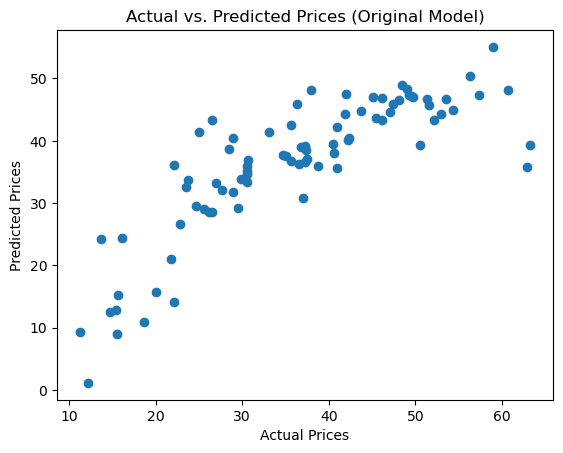

In [24]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs. Predicted Prices (Original Model)')
plt.show()

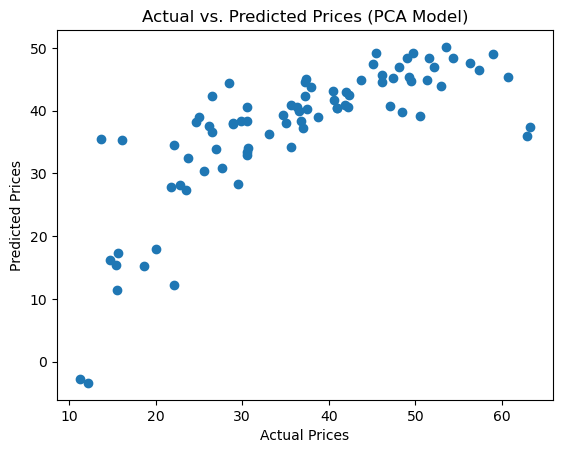

In [25]:
# Scatter plot for PCA model
plt.scatter(y_test_pca, y_pred_pca)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs. Predicted Prices (PCA Model)')
plt.show()

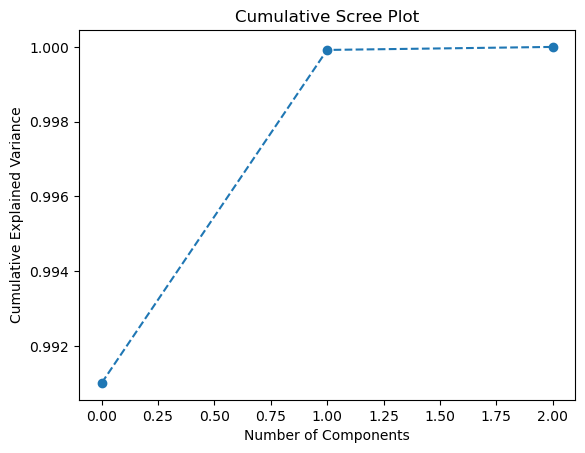

In [27]:
# Cumulative Scree Plot
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Scree Plot')
plt.show()

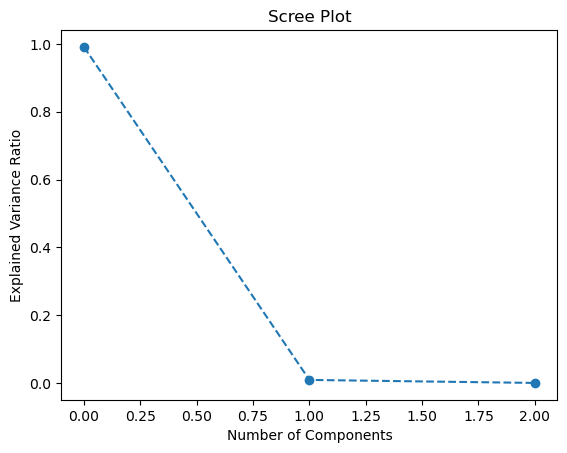

In [28]:
plt.plot(pca.explained_variance_ratio_, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.show()